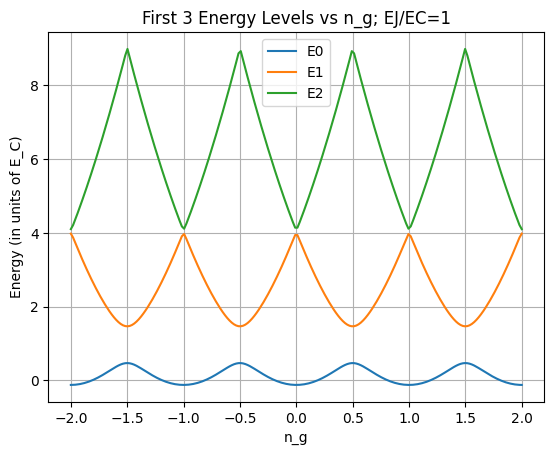

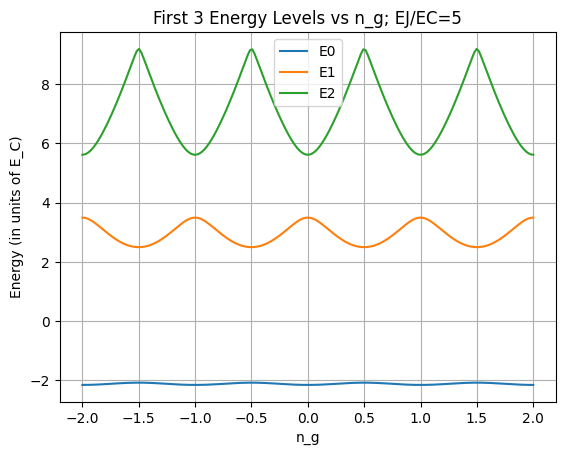

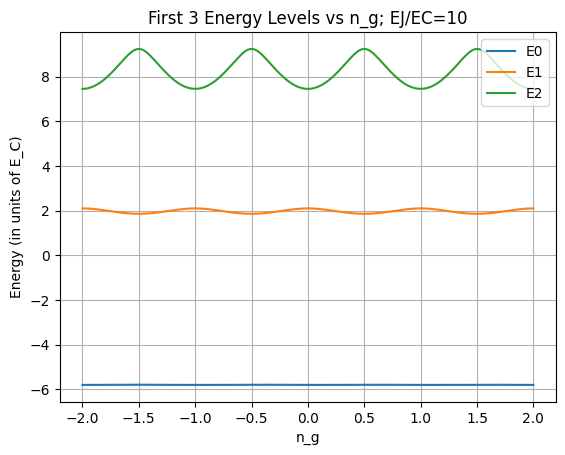

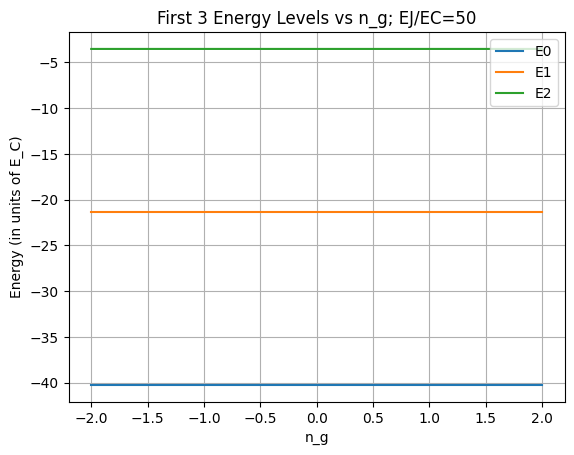

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Define constants
E_C = 1  # We set E_C to 1, and vary E_J/E_C ratios
ng_values = np.linspace(-2, 2, 200)  # Values of n_g
N_states = 15  # Truncate the charge basis to 15 states centered around n = 0
charge_states = np.arange(-N_states, N_states + 1)

# Function to construct the Hamiltonian matrix in the charge basis
def construct_hamiltonian(ng, EJ_over_EC):
    EJ = EJ_over_EC * E_C  # Calculate EJ based on ratio
    H = np.zeros((2 * N_states + 1, 2 * N_states + 1))

    # Diagonal part: 4 * E_C * (n - n_g)^2
    for i, n in enumerate(charge_states):
        H[i, i] = 4 * E_C * (n - ng) ** 2

    # Off-diagonal part: -E_J / 2 (tunneling term)
    for i in range(2 * N_states):
        H[i, i + 1] = H[i + 1, i] = -EJ / 2

    return H

# Set EJ/EC ratios to study
EJ_over_EC_values = [1, 5, 10, 50]

# Calculate and store the lowest 3 eigenvalues for each EJ/EC and ng
energy_levels = {ratio: [] for ratio in EJ_over_EC_values}
for EJ_over_EC in EJ_over_EC_values:
    for ng in ng_values:
        H = construct_hamiltonian(ng, EJ_over_EC)
        eigenvalues, _ = eigh(H)  # Diagonalize the Hamiltonian
        energy_levels[EJ_over_EC].append(eigenvalues[:3])  # First 3 eigenvalues

# Plot the first 3 energy levels for each EJ/EC ratio
for EJ_over_EC in EJ_over_EC_values:
    energies = np.array(energy_levels[EJ_over_EC]).T
    plt.plot(ng_values, energies[0], label=f"E0")
    plt.plot(ng_values, energies[1], label=f"E1")
    plt.plot(ng_values, energies[2], label=f"E2")

    plt.xlabel("n_g")
    plt.ylabel("Energy (in units of E_C)")
    plt.title(f"First 3 Energy Levels vs n_g; EJ/EC={EJ_over_EC}")
    plt.legend(loc="best")
    plt.grid(True)
    plt.savefig(f'./EJ_EC={EJ_over_EC}.jpg', dpi=600)
    plt.show()


/var/folders/54/_13g4g016975q4kygn1_b9jw0000gn/T/ipykernel_59841/1135906777.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  factor = ((-1)**m * E_C * (2**(4*m+5)) / np.math.factorial(m)) * np.sqrt(2 / np.pi)


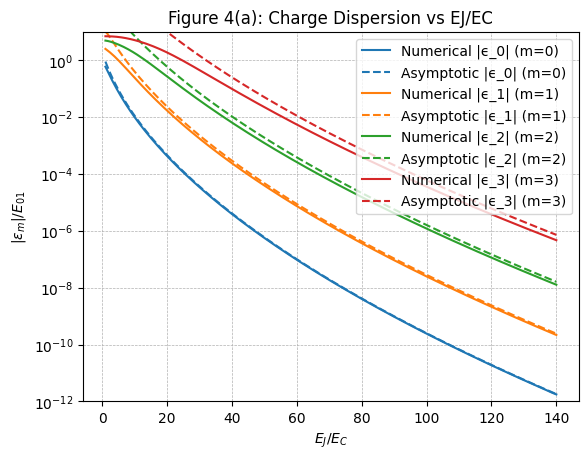

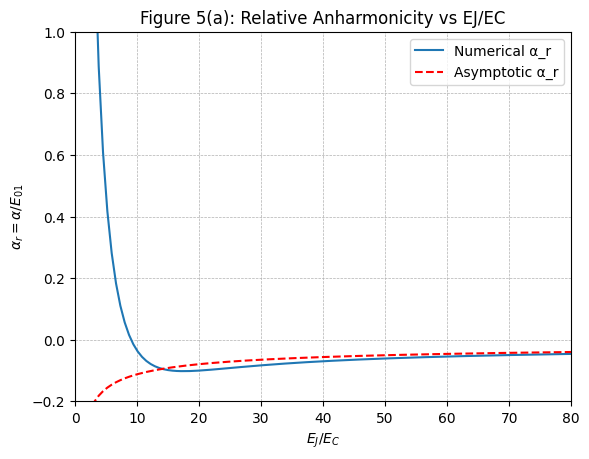

In [19]:
# Define a range for EJ/EC ratios and initialize arrays to store results
EJ_over_EC_values = np.linspace(1, 140, 200)
charge_dispersion = {m: [] for m in range(4)}  # Stores |epsilon_m| for m = 0, 1, 2, 3
anharmonicity_relative = []  # Stores alpha_r

# Function for the asymptotic charge dispersion formula (Eq. 2.5 in Koch 2007)
def asymptotic_charge_dispersion(m, EJ_over_EC):
    factor = ((-1)**m * E_C * (2**(4*m+5)) / np.math.factorial(m)) * np.sqrt(2 / np.pi)
    return abs(factor * (EJ_over_EC / 2)**(m/2 + 3/4) * np.exp(-np.sqrt(8 * EJ_over_EC)))

# Compute numerical and asymptotic results
for EJ_over_EC in EJ_over_EC_values:
    EJ = EJ_over_EC * E_C  # Calculate EJ based on ratio
    H = construct_hamiltonian(0.0, EJ_over_EC)  # Diagonalize at n_g = 0 to capture central energy levels
    eigenvalues, _ = eigh(H)  # Obtain eigenvalues
    E_levels = eigenvalues[:4]  # Extract first four energy levels

    # Charge dispersion |epsilon_m| = |E_m(n_g = 0) - E_m(n_g = 1/2)|
    H_ng_half = construct_hamiltonian(0.5, EJ_over_EC)  # Hamiltonian at n_g = 0.5
    eigenvalues_half, _ = eigh(H_ng_half)
    for m in range(4):
        charge_dispersion[m].append(abs(eigenvalues_half[m] - E_levels[m]))

    # Relative anharmonicity alpha_r = (E_12 - E_01) / E_01
    E01 = eigenvalues_half[1] - eigenvalues_half[0]
    E12 = eigenvalues_half[2] - eigenvalues_half[1]
    alpha_r = (E12 - E01) / E01
    anharmonicity_relative.append(alpha_r)

# Calculate asymptotic values for comparison
asymptotic_dispersion = {m: [asymptotic_charge_dispersion(m, EJ_over_EC) for EJ_over_EC in EJ_over_EC_values] for m in range(4)}
asymptotic_anharmonicity_relative = [-(8 * EJ_over_EC)**(-0.5) for EJ_over_EC in EJ_over_EC_values]

# Plot Figure 4(a) - Charge Dispersion
for m in range(4):
    plt.plot(EJ_over_EC_values, charge_dispersion[m], label=f'Numerical |ϵ_{m}| (m={m})', color=f'C{m}')
    plt.plot(EJ_over_EC_values, asymptotic_dispersion[m], '--', color=f'C{m}', label=f'Asymptotic |ϵ_{m}| (m={m})')

plt.yscale('log')
plt.xlabel(r'$E_J/E_C$')
plt.ylabel(r'$|\epsilon_m| / E_{01}$')
plt.legend(loc='upper right')
plt.title("Figure 4(a): Charge Dispersion vs EJ/EC")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(1e-12,10)
plt.savefig('charge_dispersion.jpg', dpi=600)
plt.show()


# Plot Figure 5(a) - Relative Anharmonicity
plt.plot(EJ_over_EC_values, anharmonicity_relative, label='Numerical α_r')
plt.plot(EJ_over_EC_values, asymptotic_anharmonicity_relative, 'r--', label='Asymptotic α_r')
plt.xlabel(r'$E_J/E_C$')
plt.ylabel(r'$ \alpha_r = \alpha / E_{01}$')
plt.legend(loc='upper right')
plt.title("Figure 5(a): Relative Anharmonicity vs EJ/EC")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(-0.2, 1)
plt.xlim(0, 80)
plt.savefig('anharmonicity.jpg', dpi=600)
plt.show()


In [1]:
from nmon import Nmon

In [5]:
nmon = Nmon(N=1, M=2, EJM=50, EJN=50, EC=1.0)

In [7]:
nmon.hamiltonian_calc(flux=0.0, ng=[0.0, 0.0], make_plot=False, num_levels=6)

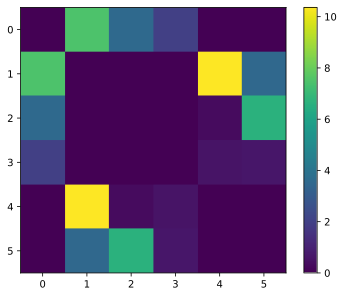

In [4]:

eigenvectors = nmon.evecs
eigenvalues = nmon.evals


# Parameters
ncut = nmon.nmon_circ.cutoff_n_1  # Charge basis cutoff
n_vals = np.arange(-ncut, ncut + 1)
dim_size = len(n_vals)  # Should be 7

# Number of variables (phases)
N = nmon.N  # Replace with your actual N
M = nmon.M  # Replace with your actual M
num_vars = N + M - 1  # Total number of phase variables (e.g., 3)

n_grids = np.meshgrid(*([n_vals] * num_vars), indexing='ij')

# Generate all possible combinations of charge states
state_list = list(itertools.product(n_vals, repeat=num_vars))
N_states = len(state_list)  # Should be 7 ** num_vars

# Mapping from multi-dimensional index to 1D index
index_map = {state: idx for idx, state in enumerate(state_list)}

# Mapping from 1D index to multi-dimensional index
inverse_index_map = {idx: state for idx, state in enumerate(state_list)}

num_levels = eigenvectors.shape[1]  # Number of energy levels

# Assuming eigenvectors is of shape (N_states, num_levels)
dim_sizes = [dim_size] * num_vars
eigenvectors_md_shape = dim_sizes + [num_levels]
eigenvectors_md = np.zeros(eigenvectors_md_shape, dtype=complex)

# Populate the multi-dimensional eigenvector arrays
for idx in range(N_states):
    indices = inverse_index_map[idx]
    indices_array = np.array(indices) + ncut  # Adjust indices to start from 0
    eigenvectors_md[tuple(indices_array)] = eigenvectors[idx, :]




import numpy as np
import itertools

import sympy as sp

# Generate symbolic phase variables theta1, theta2, ..., thetan
n_symbols = sp.symbols(f'n1:{num_vars+1}')  # Generates theta1 to thetan
ng_symbols = sp.symbols(f'n_g1:{num_vars+1}')  # Generates theta1 to thetan
_2pi_Phi1 = sp.symbols('(2πΦ_{1})')

# Compute derivatives with respect to each theta_i
derivatives = []
for ng_sym in ng_symbols:
    dH_dng = nmon.sym_hamiltonian.diff(ng_sym)
    derivatives.append(dH_dng)

# Sum all the derivatives to get the gradient
gradient_H = sum(derivatives)

gradient_H = gradient_H.subs({_2pi_Phi1: 2*np.pi*nmon.flux})
for i, ng_sym in enumerate(ng_symbols):
    gradient_H = gradient_H.subs({ng_sym: nmon.ng[i]})

# Convert the symbolic expression to a numerical function
gradient_func = sp.lambdify(n_symbols, gradient_H, modules=['numpy'])

gradient_H

G_ng = gradient_func(*n_grids)

import matplotlib.pyplot as plt
from tqdm import tqdm

transition_matrix = np.zeros((num_levels, num_levels), dtype=np.complex128)

for i in range(num_levels):
    psi_i = eigenvectors_md[..., i]
    for j in range(num_levels):
        psi_j = eigenvectors_md[..., j]
        # Compute the element-wise product and sum over all indices
        M_ij = np.sum(np.conj(psi_i) * G_ng * psi_j)
        transition_matrix[i, j] = M_ij

plt.imshow(np.absolute(transition_matrix[:, :]), cmap='viridis', interpolation='nearest')
plt.colorbar()

In [7]:
import numpy as np
import itertools

# Parameters
ncut = 3  # Charge basis cutoff
n_vals = np.arange(-ncut, ncut + 1)
dim_size = len(n_vals)
N_theta = 64  # Number of points in the theta grid for each variable
theta_vals = np.linspace(-np.pi, np.pi, N_theta, endpoint=False)
theta_vals = np.linspace(0, 2*np.pi, N_theta, endpoint=False)

# Number of variables (phases)
N = nmon.N  # Replace with your actual N
M = nmon.M  # Replace with your actual M
num_vars = N + M - 1

# Generate all possible combinations of charge states
state_list = list(itertools.product(n_vals, repeat=num_vars))
N_states = len(state_list)

# Mapping from charge states to indices
index_map = {state: idx for idx, state in enumerate(state_list)}

# Create the phase grids for each variable
theta_grids = np.meshgrid(*([theta_vals] * num_vars), indexing='ij')

# Load or compute eigenvectors from your Hamiltonian
# For demonstration, let's assume 'eigenvectors' is an array of shape (N_states, num_levels)
# eigenvectors = ...

# Reshape eigenvectors to have dimensions (dim_size, dim_size, ..., num_levels)
coeffs_shape = [dim_size] * num_vars + [eigenvectors.shape[1]]  # eigenvectors.shape[1] = num_levels
coeffs = eigenvectors.reshape(coeffs_shape)

# Prepare an array to hold the eigenfunctions in the phase basis
Psi_theta_shape = [N_theta] * num_vars + [eigenvectors.shape[1]]
Psi_theta = np.zeros(Psi_theta_shape, dtype=complex)

# Loop over eigenvectors (eigenstates)
for k in range(eigenvectors.shape[1]):
    # Get the coefficients for the k-th eigenvector
    coeff_k = coeffs[..., k]
    # Perform n-dimensional inverse FFT
    Psi_k = np.fft.ifftn(coeff_k, s=[N_theta] * num_vars) # TODO from -np.pi to np.pi
    # Store the result
    Psi_theta[..., k] = Psi_k * (N_theta ** num_vars)  # Scale due to FFT conventions


In [8]:
Psi_theta.shape

(64, 64, 6)

In [9]:
import sympy as sp

# Number of variables (phases)
N = nmon.N  # Replace with your actual N value
M = nmon.M  # Replace with your actual M value
num_vars = N + M - 1  # Total number of phase variables

# Generate symbolic phase variables theta1, theta2, ..., thetan
theta_symbols = sp.symbols(f'θ1:{num_vars+1}')  # Generates theta1 to thetan
_2pi_Phi1 = sp.symbols('(2πΦ_{1})')

# Compute derivatives with respect to each theta_i
derivatives = []
for theta in theta_symbols:
    dH_dtheta = sym_hamiltonian.diff(theta)
    derivatives.append(dH_dtheta)

# Sum all the derivatives to get the gradient
gradient_H = sum(derivatives)

gradient_H = gradient_H.subs({_2pi_Phi1: 2*np.pi*0.0})

# Convert the symbolic expression to a numerical function
gradient_func = sp.lambdify(theta_symbols, gradient_H, modules=['numpy'])

G = gradient_func(*theta_grids)

G.shape

(64, 64)

100%|██████████| 6/6 [00:00<00:00, 43.97it/s]


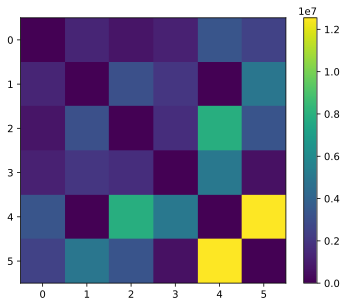

In [10]:
import matplotlib.pyplot as plt
from tqdm import tqdm

transition_matrix = np.zeros((nmon.dims, nmon.dims), dtype=np.complex128)  # Initialize the transition matrix

for i in tqdm(range(nmon.dims)):
    for j in range(nmon.dims):
        transition_matrix[i, j] = np.sum(  np.dot(Psi_theta[:, :, i].conj(), np.dot(G, Psi_theta[:, :, j]) )  )

plt.imshow(np.absolute(transition_matrix[:, :]), cmap='viridis', interpolation='nearest')
plt.colorbar()

In [11]:
nmon.nmon_circ.variable_transformation()

<IPython.core.display.Latex object>

In [12]:
nmon.nmon_circ.offset_charge_transformation()

<IPython.core.display.Latex object>

In [11]:
'''
TODO

Generalize the code above for any number of n, etc...

Compare the old approach to the new one

Do the derivatives in the charge basis (wrt n_g)

Make sure -np.pi , np.pi

Limit phase calculation to the diagonal part. Just calculate theta_grid_i = phi_grid * theta_coef!!!



'''

'\nTODO\n\nGeneralize the code above for any number of n, etc...\n\nCompare the old approach to the new one\n\nDo the derivatives in the charge basis (wrt n_g)\n\nMake sure -np.pi , np.pi\n\nLimit phase calculation to the diagonal part. Just calculate theta_grid_i = phi_grid * theta_coef!!!\n\n\n\n'

In [12]:
C_matr = nmon.nmon_circ.symbolic_circuit._capacitance_matrix()
Matr = nmon.nmon_circ.transformation_matrix
M_inv  = np.linalg.inv(Matr)
EC_old_basis = M_inv.T @ np.linalg.inv(C_matr) @ M_inv

import sympy as sp

# Define the symbols for the charge operators and gate-induced charges
n1, n2 = sp.symbols('n1 n2', commutative=True)  # Charge operators (non-commutative if necessary)
ng1, ng2 = sp.symbols('ng1 ng2')  # Gate-induced charges

EC_new = EC_old_basis

# Define the charge operator vectors (add ng to each)
n_vector = sp.Matrix([n1 + ng1, n2 + ng2])

# Construct the Hamiltonian using matrix multiplication for the charging energy terms
H_C = n_vector.T * EC_new * n_vector

# Simplify the expression to make it more readable
expanded = sp.expand(H_C[0])

H_C_simplified = sp.simplify(expanded)  # Access the first element as it results in a 1x1 matrix

# Display the Hamiltonian
H_C_simplified/2

ShapeError: Matrix size mismatch: (1, 2) * (3, 3).